In [2]:
%pip install numpy pandas matplotlib seaborn


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
train_df = pd.read_csv('train.csv')
# print(df.head())
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
# df.info()
print(f"Dataset Shape: {train_df.shape}")
train_df.isnull().sum()

Dataset Shape: (7613, 5)


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

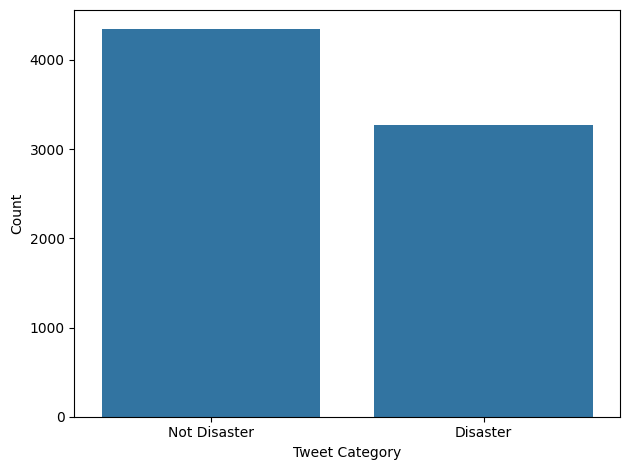

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution
sns.countplot(x='target', data=train_df)
plt.xlabel('Tweet Category')
plt.xticks([0, 1], ['Not Disaster', 'Disaster'])
plt.ylabel('Count')
plt.tight_layout()
# plt.show()